# Statistical tests for HR data

In [90]:
!pip install -q pandas

## Hipotheses
**H0 = "Younger part of employees earn the same as older one"**\
**H1 = "Younger part of employees earn more than older one"**

In [91]:
import pandas as pd

df = pd.read_csv("data/hr_data_silver.csv")

In [92]:
median_age = df.Age.median()
display(f"Median age: {median_age}")

'Median age: 36.0'

In [93]:
age_calass = ["old" if age > df.Age.median() else "young" for age in df.Age]

In [94]:
df = pd.DataFrame(
    {"AgeClass": age_calass, "Age": df.Age, "YearlySalary": df.MonthlyIncome}
)

In [95]:
df.head(5)

,AgeClass,Age,YearlySalary
0,old,51,131160
1,young,31,41890
2,young,32,193280
3,old,38,83210
4,young,32,23420


## Check the distribution of the salaries for old and young employees

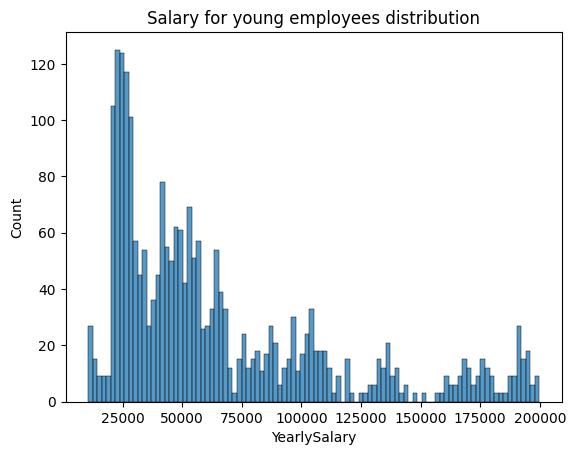

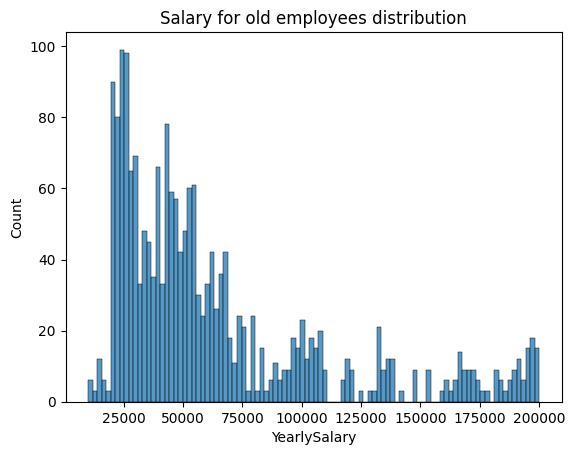

In [96]:
!pip install -q matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns


df_young = df[df.AgeClass == "young"]
df_old = df[df.AgeClass == "old"]

sns.histplot(df_young.YearlySalary, bins=100)
plt.title("Salary for young employees distribution")
plt.show()

sns.histplot(df_old.YearlySalary, bins=100)
plt.title("Salary for old employees distribution")
plt.show()

### Test normal distribution with Shapiro-Wilk test

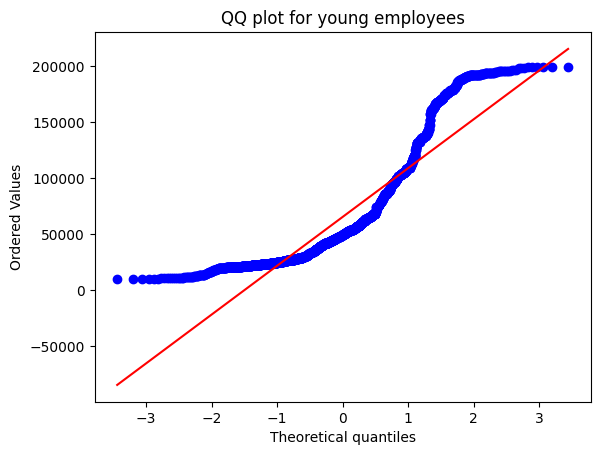

Shapiro-Wilk stat: 0.8149195610480224
p-value: 3.927601276024286e-43


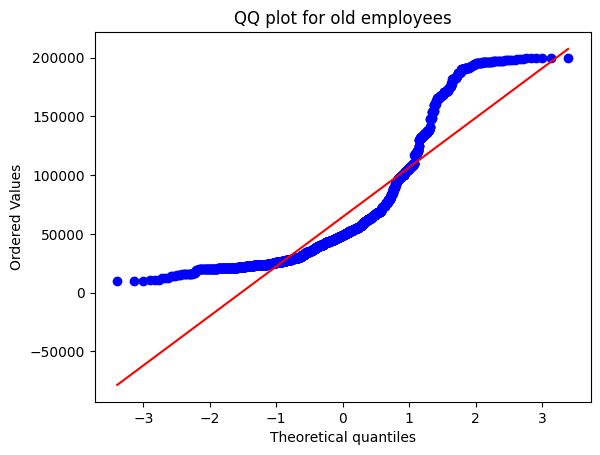

Shapiro-Wilk stat: 0.8149195610480224
p-value: 3.927601276024286e-43


In [97]:
!pip install -q scipy

from scipy import stats

stats.probplot(df_young.YearlySalary, dist="norm", plot=plt)
plt.title("QQ plot for young employees")
plt.show()

stat, p_value = stats.shapiro(df_old.YearlySalary)
print(f"Shapiro-Wilk stat: {stat}")
print(f"p-value: {p_value}")

stats.probplot(df_old.YearlySalary, dist="norm", plot=plt)
plt.title("QQ plot for old employees")
plt.show()

stat, p_value = stats.shapiro(df_old.YearlySalary)
print(f"Shapiro-Wilk stat: {stat}")
print(f"p-value: {p_value}")

**Observation: Salaries distribution for both old and young employees does not have normal (Gaussian) distribution**

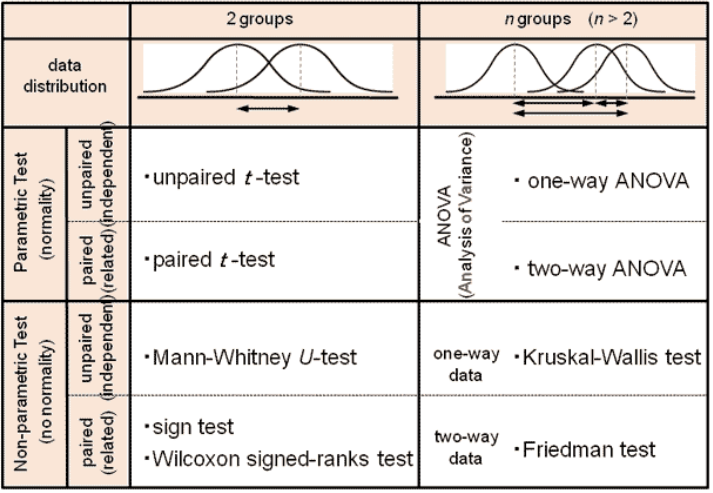

In this case we analize 2, unaprired groups where distribution is not normal. Let's do **Mann-Whitney** test.

In [101]:
from scipy.stats import mannwhitneyu

print("Mann-Whitneyu test for salaries in Young and Old employees groups")
stat, p_value = mannwhitneyu(df_young.YearlySalary, df_old.YearlySalary)
print(f"Mann-Whitneyu stat: {stat}")
print(f"p-value: {p_value}")

Mann-Whitneyu test for salaries in Young and Old employees groups
Mann-Whitneyu stat: 2390343.5
p-value: 0.8521667959613369


### **Result** - The Mann–Whitney U test yielded a p-value that indicates no statistically significant difference in the salary between the groups.